**Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.**

**Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age.**

- **Thus, accurately predicting COVID-19 and understanding the symptoms are very important.**
- **ML algorithms could be good for predicting the COVID-19**

### Aim

**(1)  to identify patterns in the data and important features that may impact a ML model.**

**(2)  Using machine learning models predict covid-19**

In [8]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn import tree

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Importing dataset
covid_raw = pd.read_csv("corona_tested_006.csv")

In [13]:
# Making copy of dataset
covid = covid_raw.copy()

In [14]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [15]:
covid.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


**Except date all are categorical feature**
- **Corona is our Outcome/ target variable**



In [16]:
covid.shape

(278848, 11)

**Possible symptoms include:**

- Fever or chills
- Cough
- Shortness of breath or difficulty breathing
- Fatigue
- Muscle or body aches
- Headache
- New loss of taste or smell
- Sore throat
- Congestion or runny nose
- Nausea or vomiting
- Diarrhea

In [17]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


**It is showing that there are no any missing values**

In [18]:
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [19]:
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [20]:
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [21]:
covid['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [22]:
covid['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [23]:
covid['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

**There are some missing values in the dataset which has inserted as None**

In [24]:
covid.replace(['TRUE','FALSE'],[True, False], inplace = True)

In [25]:
covid['Cough_symptoms'].replace(['TRUE','FALSE'], [True, False], inplace = True)

In [26]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


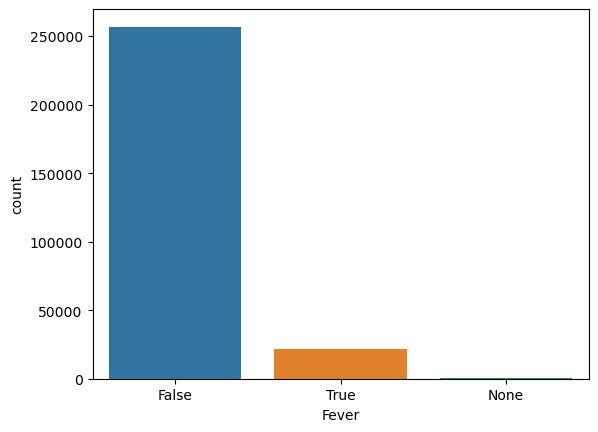

In [27]:
sns.countplot(data = covid , x = 'Fever')
plt.show()

**Count plot shows the data is imbalanced, we can see there are very less number of people who have suffered from fever**.

In [28]:
count = covid['Cough_symptoms'].value_counts()
count

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

In [29]:
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              3
Fever                       3
Sore_throat                 3
Shortness_of_breath         3
Headache                    3
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [30]:
covid_1 = covid.replace(['None', 'other',], np.nan, regex = True)

In [31]:
covid_1.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [32]:
covid_1.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [33]:
covid_1.isnull().mean()*100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  1.395742
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

<AxesSubplot:>

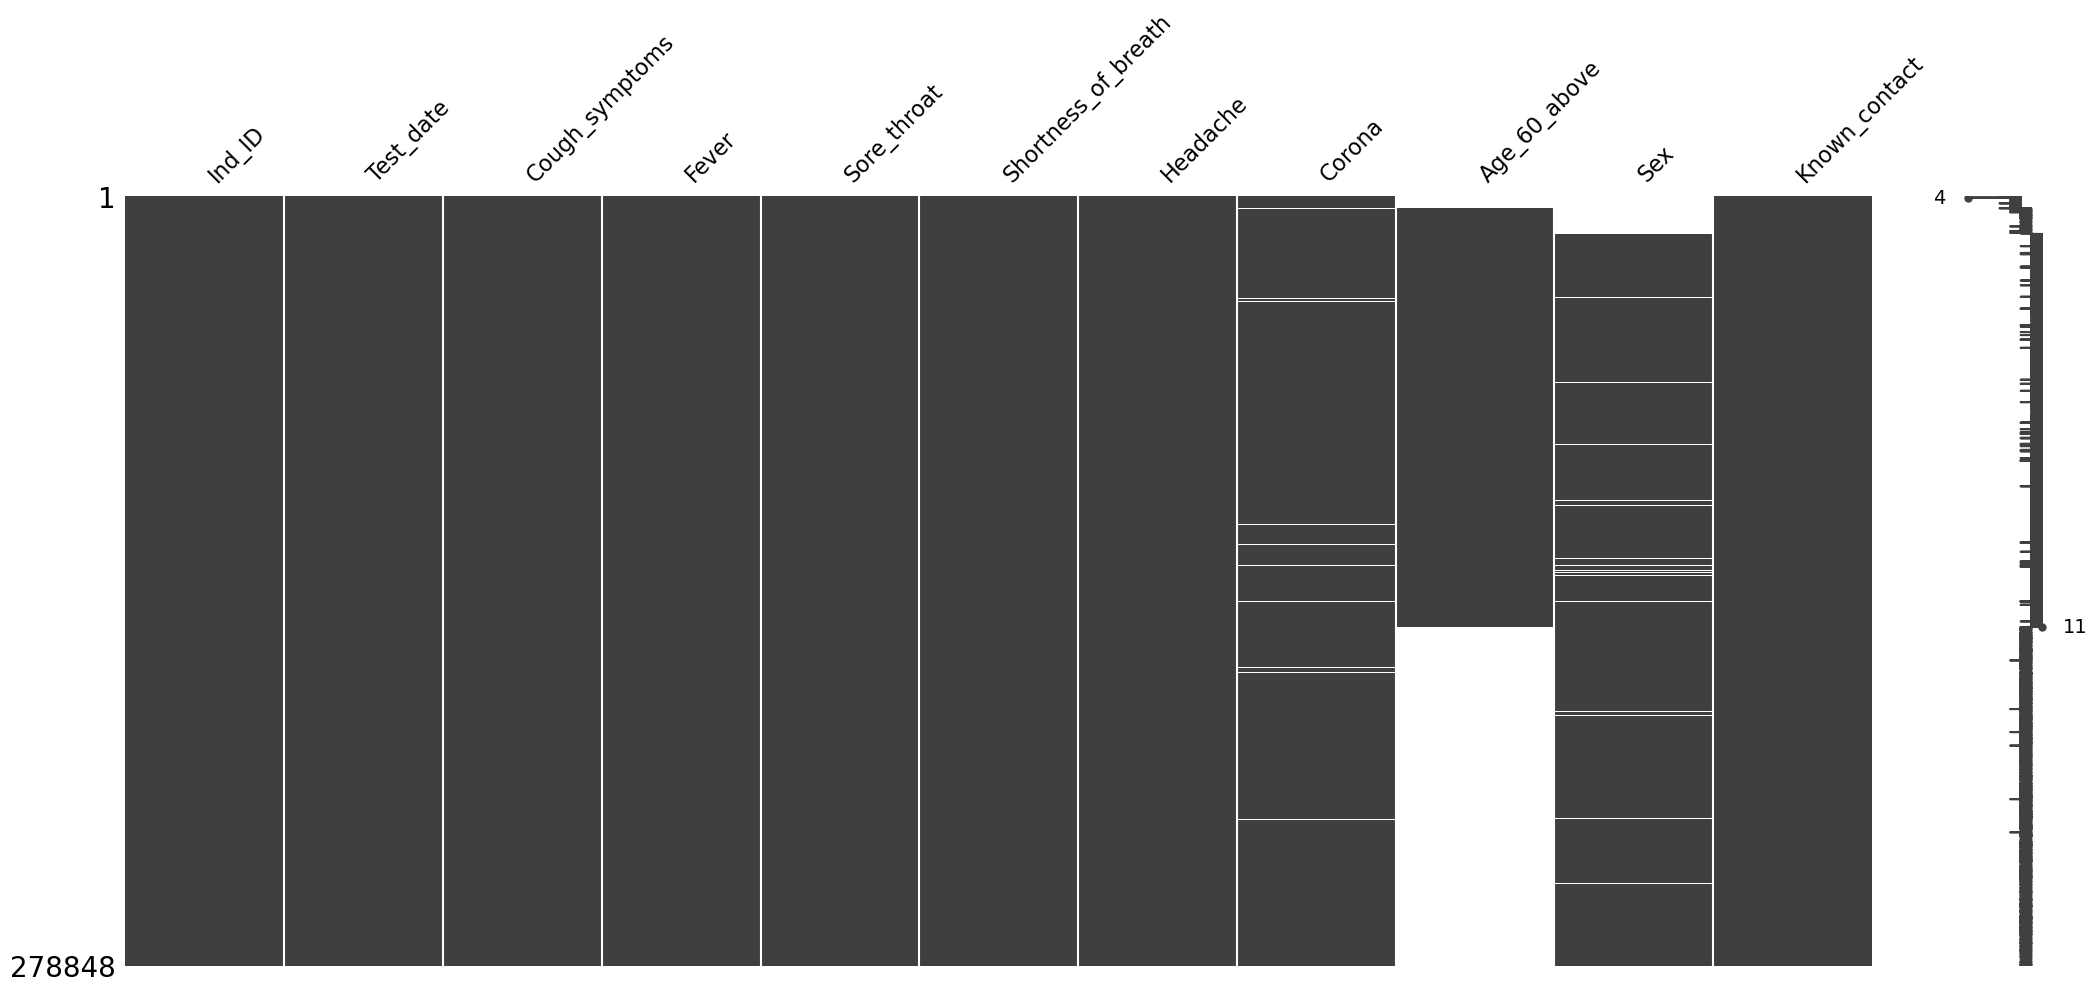

In [34]:
msno.matrix(covid_1)

**Age_60_above and sex has 45% and 7% has missing values respectively.**

In [35]:
covid_1.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [36]:
covid_1['Known_contact'].unique()
count = covid_1['Known_contact'].value_counts()
count

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [37]:
covid_1['Corona'].unique()

array(['negative', 'positive', nan], dtype=object)

In [38]:
covid_2 = covid_1[['Cough_symptoms','Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Sex', 'Known_contact', 'Corona']]

In [39]:
covid_2.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
0,True,False,True,False,False,NaN,Abroad,negative
1,False,True,False,False,False,NaN,Abroad,positive
2,False,True,False,False,False,NaN,Abroad,positive
3,True,False,False,False,False,NaN,Abroad,negative
4,True,False,False,False,False,NaN,Contact with confirmed,negative


In [40]:
covid_2.isnull().sum()

Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Sex                    19563
Known_contact              0
Corona                  3892
dtype: int64

## Univariate analysis

negative    260227
positive     14729
Name: Corona, dtype: int64


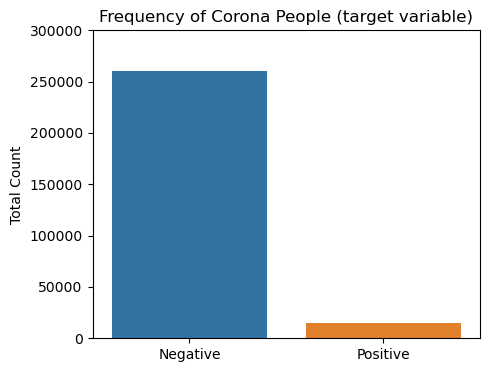

In [41]:
plt.figure(figsize=(5,4))
count = covid_2['Corona'].value_counts()
print(count)
cov_status = ['Negative', 'Positive']
sns.barplot(cov_status, count)
plt.title("Frequency of Corona People (target variable)")
plt.ylabel("Total Count")
plt.ylim(0,300000)
plt.show()

**Our target variable is also imbalanced because the ratio of both the categories is very high**

False    236368
True      42228
Name: Cough_symptoms, dtype: int64


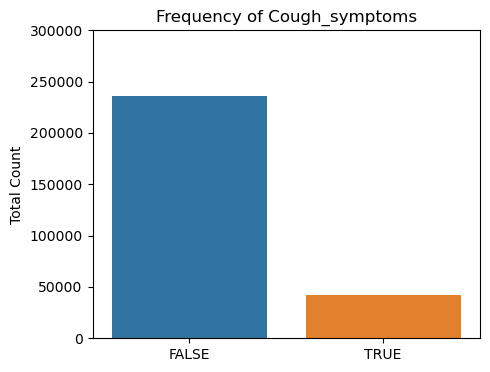

In [42]:
plt.figure(figsize=(5,4))
count = covid_2['Cough_symptoms'].value_counts()
print(count)
cov_status = ['FALSE', 'TRUE']
sns.barplot(cov_status, count)
plt.title("Frequency of Cough_symptoms")
plt.ylabel("Total Count")
plt.ylim(0,300000)
plt.show()

False    276921
True       1926
Name: Sore_throat, dtype: int64


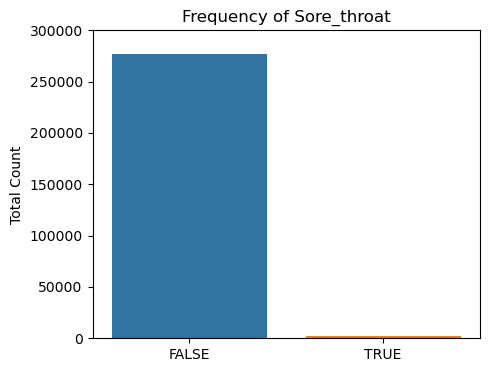

In [43]:
plt.figure(figsize=(5,4))
count = covid_2['Sore_throat'].value_counts()
print(count)
cov_status = ['FALSE', 'TRUE']
sns.barplot(cov_status, count)
plt.title("Frequency of Sore_throat")
plt.ylabel("Total Count")
plt.ylim(0,300000)
plt.show()

False    277270
True       1577
Name: Shortness_of_breath, dtype: int64


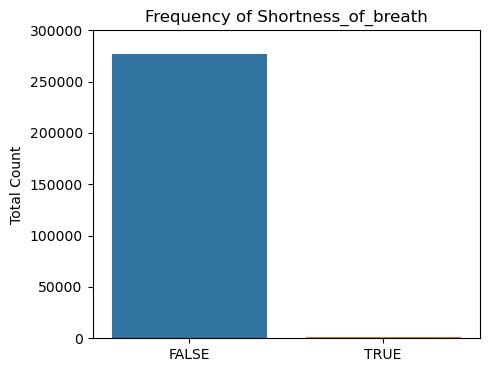

In [44]:
plt.figure(figsize=(5,4))
count = covid_2['Shortness_of_breath'].value_counts()
print(count)
cov_status = ['FALSE', 'TRUE']
sns.barplot(cov_status, count)
plt.title("Frequency of Shortness_of_breath")
plt.ylabel("Total Count")
plt.ylim(0,300000)
plt.show()

False    276433
True       2414
Name: Headache, dtype: int64


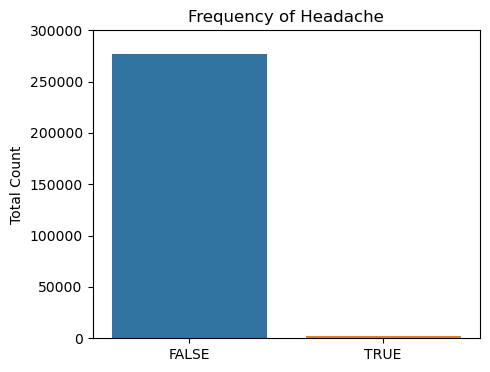

In [45]:
plt.figure(figsize=(5,4))
count = covid_2['Headache'].value_counts()
print(count)
cov_status = ['FALSE', 'TRUE']
sns.barplot(cov_status, count)
plt.title("Frequency of Headache")
plt.ylabel("Total Count")
plt.ylim(0,300000)
plt.show()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64


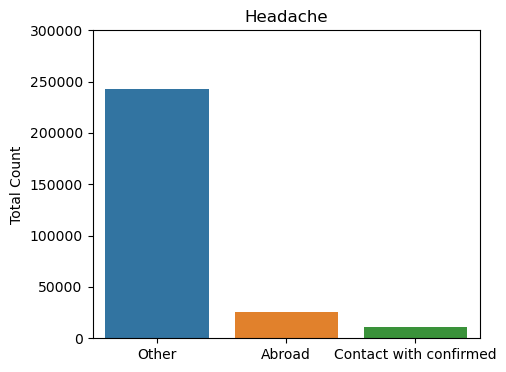

In [46]:
plt.figure(figsize=(5,4))
count = covid_2['Known_contact'].value_counts()
print(count)
cov_status = ['Other', 'Abroad', 'Contact with confirmed']
sns.barplot(cov_status, count)
plt.title("Headache")
plt.ylabel("Total Count")
plt.ylim(0,300000)
plt.show()

False    256844
True      21752
Name: Fever, dtype: int64


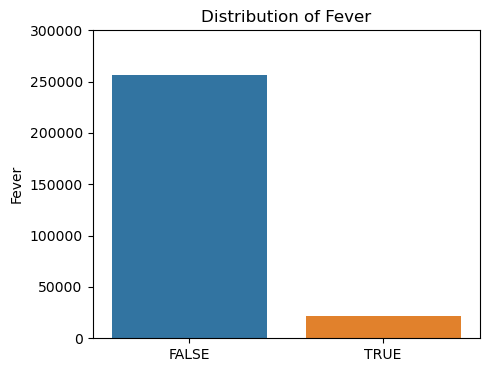

In [47]:
plt.figure(figsize=(5,4))
count = covid_2['Fever'].value_counts()
print(count)
cov_status = ['FALSE', 'TRUE']
sns.barplot(cov_status, count)
plt.title("Distribution of Fever")
plt.ylim(0,300000)
plt.show()

female    130158
male      129127
Name: Sex, dtype: int64


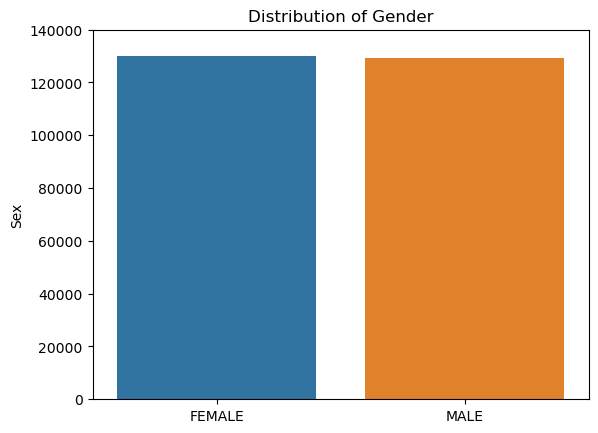

In [48]:
count_gen = covid_2['Sex'].value_counts()
print(count_gen)
gen_status = ['FEMALE', 'MALE']
sns.barplot(gen_status, count_gen)
plt.title("Distribution of Gender")
plt.ylim(0,140000)
plt.show()

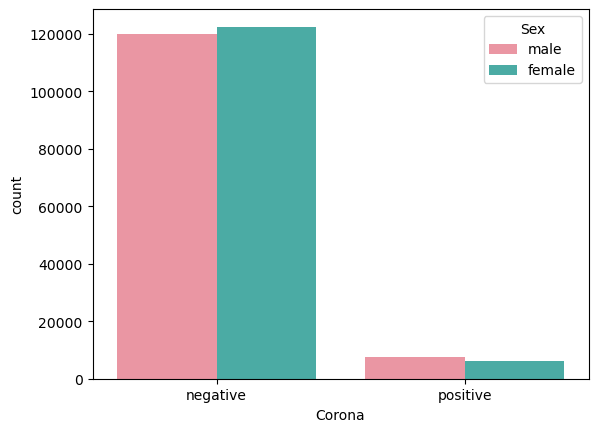

In [152]:
sns.set_palette("hls", 1)
sns.countplot(x='Corona', hue='Sex', data=covid_2)
plt.show()

**Males are Slightly more suffered with Cororna as compared to female**

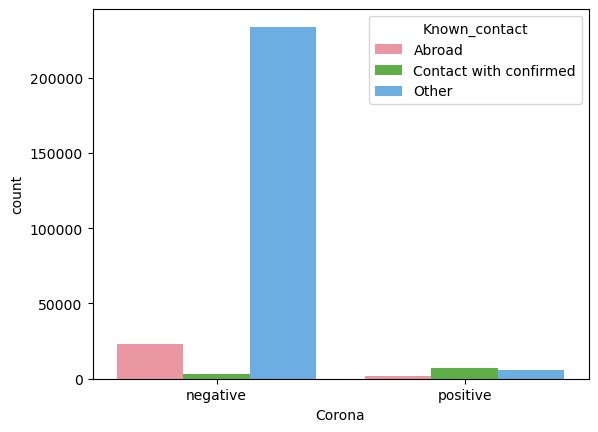

In [186]:
sns.set_palette("hls", 1)
sns.countplot(x='Corona', hue='Known_contact', data=covid_2)
plt.show()

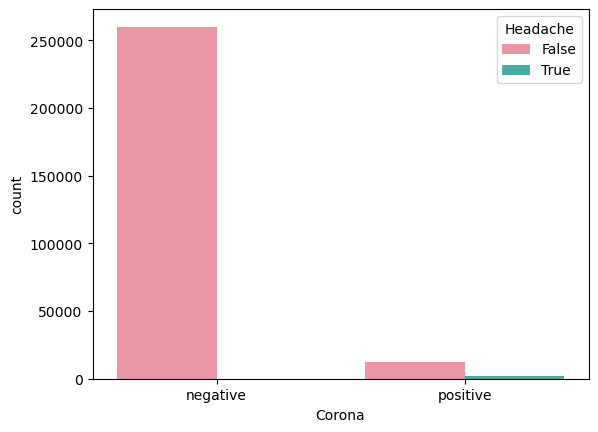

In [190]:
sns.set_palette("hls", 1)
sns.countplot(x='Corona', hue='Headache', data=covid_2)
plt.show()

**Those who have covid-19 they are suffering from Headache**

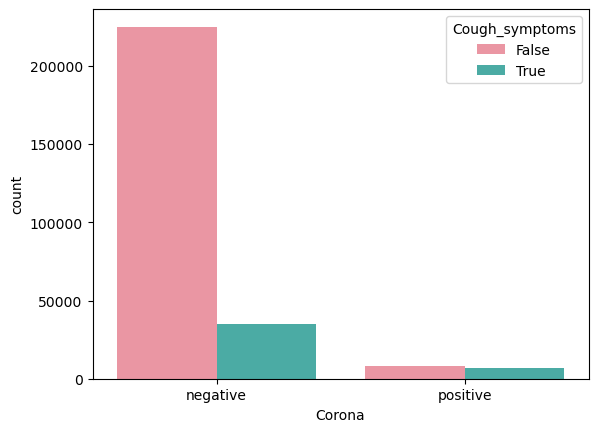

In [192]:
sns.set_palette("hls", 1)
sns.countplot(x='Corona', hue='Cough_symptoms', data=covid_2)
plt.show()

**Those who have covid-19, they are also suffering from Coughs**

Text(0, 0.5, '')

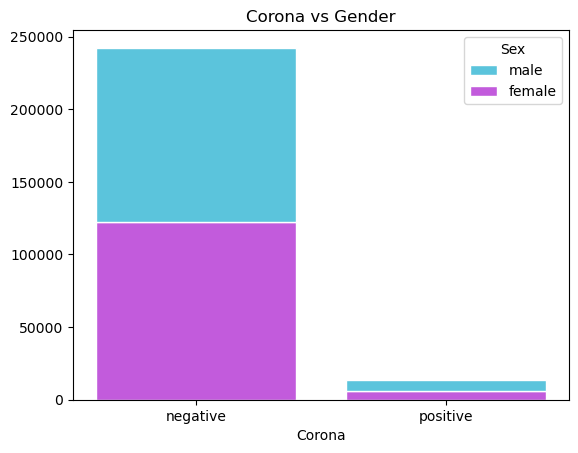

In [191]:
ax = sns.histplot(
    covid_2,
    x='Corona',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    
    hue='Sex',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Corona vs Gender')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

In [49]:
#mode imputation
covid_mode = covid_2.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent')
covid_mode.iloc[:, :] = mode_imputer.fit_transform(covid_mode)

In [50]:
covid_mode.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
0,True,False,True,False,False,female,Abroad,negative
1,False,True,False,False,False,female,Abroad,positive
2,False,True,False,False,False,female,Abroad,positive
3,True,False,False,False,False,female,Abroad,negative
4,True,False,False,False,False,female,Contact with confirmed,negative


In [75]:
covid_mode.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Sex                    0
Known_contact          0
Corona                 0
dtype: int64

**Feature Selection**

In [52]:
# Chi-square test
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [53]:
covid_encod = covid_mode.copy()
covid_encod["Sex"]=pd.get_dummies(covid_encod["Sex"],drop_first=True)
covid_encod["Corona"]=pd.get_dummies(covid_encod["Corona"],drop_first=True)

In [54]:
# label encoding using sklearn
LE=LabelEncoder()
LE.fit(covid_encod["Known_contact"])
covid_encod["Known_contact"]=LE.transform(covid_encod["Known_contact"])
# Other - 2
# Abroad - 0
# Contact with confirmed - 1

In [55]:
X = covid_encod.iloc[:, :-1]
Y = covid_encod.iloc[:, -1]

In [56]:
X.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact
0,True,False,True,False,False,0,0
1,False,True,False,False,False,0,0
2,False,True,False,False,False,0,0
3,True,False,False,False,False,0,0
4,True,False,False,False,False,0,1


In [57]:
sklearn.feature_selection.chi2(X, Y)

(array([ 8970.87144981, 17870.96552629, 21051.77305705, 14802.73414955,
        36775.28882368,    75.50044027,  2453.34929941]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.65325418e-18, 0.00000000e+00]))

**As the Chi-square value of Sex(Independent Variable) is very less we can drop that column**

## Encoding

In [58]:
# using dummy encoding
covid_encode = covid_encod.copy()
covid_encode["Cough_symptoms"]=pd.get_dummies(covid_encode["Cough_symptoms"],drop_first=True)
covid_encode["Fever"]=pd.get_dummies(covid_encode["Fever"],drop_first=True)
covid_encode["Sore_throat"]=pd.get_dummies(covid_encode["Sore_throat"],drop_first=True)
covid_encode["Shortness_of_breath"]=pd.get_dummies(covid_encode["Shortness_of_breath"],drop_first=True)
covid_encode["Headache"]=pd.get_dummies(covid_encode["Headache"],drop_first=True)


In [59]:
covid_encode.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0


### Dealing with Imbalanced data 

In [60]:
positive = covid_encod[covid_encod['Corona']==1]
negative = covid_encod[covid_encod['Corona']==0]

In [61]:
print(positive.shape, negative.shape)

(14729, 8) (264119, 8)


In [62]:
# oversampling
# cs_1_over = positive.sample(count_cs_0, replace=True)
# cs_test_over = pd.concat([negative, cs_1_over], axis=0)

# print('Random over-sampling:')
# print(cs_test_over['Corona'].value_counts())

# cs_test_over['Corona'].value_counts().plot(figsize =(5,4),kind='bar', color = ['Green', 'Red'] ,title='Corona')


###  X and Y arrays

In [98]:
x = covid_encode[['Cough_symptoms','Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']]
y = covid_encod.Corona

## Train Test Split

In [99]:
# Used Sklearn train test split
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [100]:
# Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# smote_sampled_X, smote_sampled_Y = sm.fit_resample(x.drop('Corona', axis=1), y.Corona)
# smote_sampled = pd.concat([pd.DataFrame(smote_sampled_Y), pd.DataFrame(smote_sampled_X)], axis=1)

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
smote_sampled = pd.concat([pd.DataFrame(y_train_res), pd.DataFrame(x_train_res)], axis=1)

In [101]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
273038,1,1,0,0,0,0
104064,1,0,0,0,0,0
43977,1,0,0,0,0,1
199582,0,0,0,0,0,2
112347,1,1,0,0,0,0
...,...,...,...,...,...,...
257442,0,0,0,0,0,2
36777,0,0,0,0,0,2
34336,0,0,0,0,0,2
85964,0,0,0,0,0,2


## Logistic regression

**As the assumptions of logistic regression are not satisfied, So we cannot use logistics regression**

## Support Vector Classifier

In [102]:
#Importing SVM model
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

#Creating a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train_res, y_train_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [103]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[57745,  8242],
       [  679,  3046]], dtype=int64)

In [105]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     65987
           1       0.27      0.82      0.41      3725

    accuracy                           0.87     69712
   macro avg       0.63      0.85      0.67     69712
weighted avg       0.95      0.87      0.90     69712



In [168]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.8464073653718451

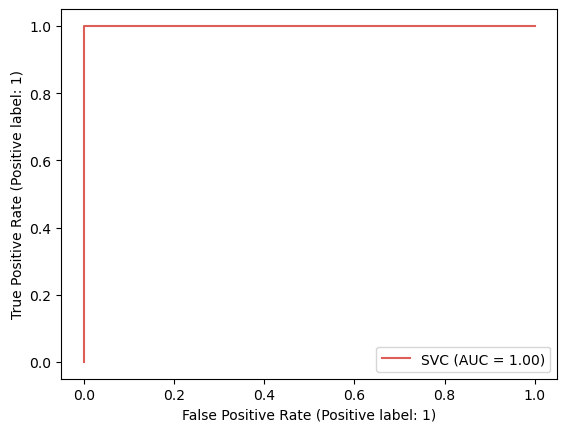

In [169]:
metrics.plot_roc_curve(clf, X_test, y_pred)
plt.show()

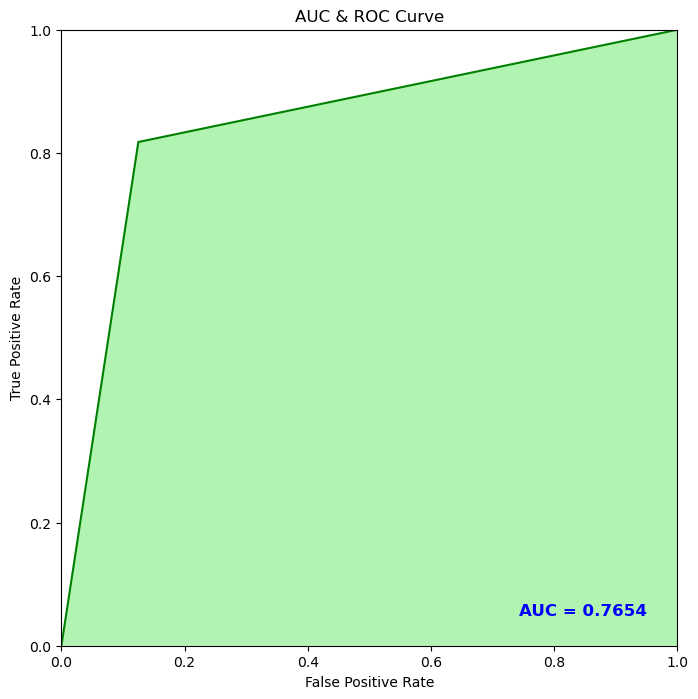

In [175]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Decision Tree

In [106]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(x_train,y_train)

#Predict the response for test dataset
Y_pred = classification.predict(X_test)

In [107]:
print(f"Decision tree training set accuracy: {format(classification.score(x_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9673 
Decision tree testing set accuracy: 0.9678 


In [108]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Y_pred))    

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     65987
           1       0.79      0.54      0.64      3725

    accuracy                           0.97     69712
   macro avg       0.88      0.77      0.81     69712
weighted avg       0.96      0.97      0.96     69712



In [170]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, Y_pred)
auc

0.7654027623704202

## Random Forest Classification Model

In [114]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy')

In [115]:
#Predicting the test set result  
y_predict= classifier.predict(X_test)  

In [116]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_predict) 

In [117]:
#Output
print(cm)

[[65459   528]
 [ 1716  2009]]


In [118]:
print(classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     65987
           1       0.79      0.54      0.64      3725

    accuracy                           0.97     69712
   macro avg       0.88      0.77      0.81     69712
weighted avg       0.96      0.97      0.96     69712



In [176]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_predict)
auc

0.7656636414961946

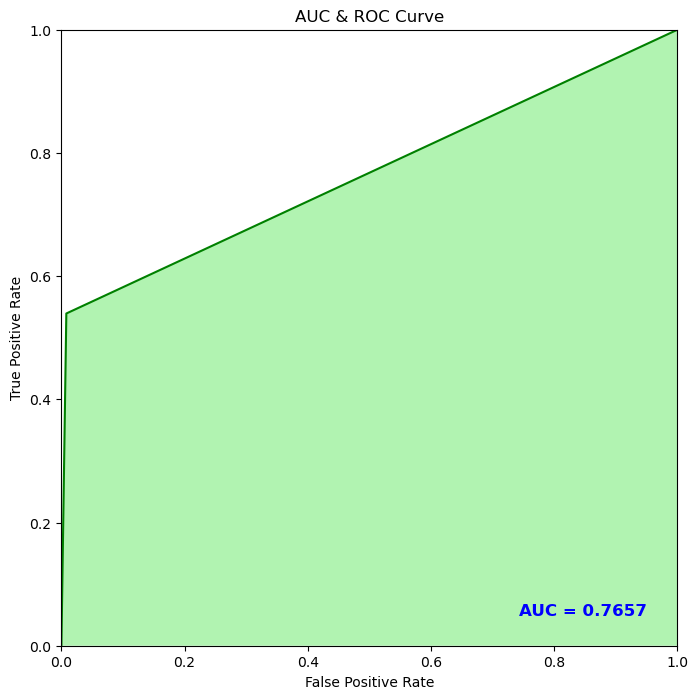

In [177]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [145]:
covid12 = covid_1[['Ind_ID','Test_date']]
covid12.head()
covid13 = covid12.combine_first(covid_mode)
covid13.head()

,Corona,Cough_symptoms,Fever,Headache,Ind_ID,Known_contact,Sex,Shortness_of_breath,Sore_throat,Test_date
0,negative,True,False,False,1,Abroad,female,False,True,11-03-2020
1,positive,False,True,False,2,Abroad,female,False,False,11-03-2020
2,positive,False,True,False,3,Abroad,female,False,False,11-03-2020
3,negative,True,False,False,4,Abroad,female,False,False,11-03-2020
4,negative,True,False,False,5,Contact with confirmed,female,False,False,11-03-2020


## Loading in MySQL

In [151]:
def Snippet_105():
    print()
    print(format('How to save Pandas DataFrame as Excel file','*^82'))
    
    import warnings
    warnings.filterwarnings("ignore")
    
    covid_mysql = pd.DataFrame(covid13)
    print(); print(covid_mysql)
    
    covid_mysql.to_csv('covid13.excel',header=False, escapechar=' ', index = False)
    
    
Snippet_105()


********************How to save Pandas DataFrame as Excel file********************

          Corona Cough_symptoms  Fever Headache  Ind_ID  \
0       negative           True  False    False       1   
1       positive          False   True    False       2   
2       positive          False   True    False       3   
3       negative           True  False    False       4   
4       negative           True  False    False       5   
...          ...            ...    ...      ...     ...   
278843  positive          False  False    False  278844   
278844  negative          False  False    False  278845   
278845  negative          False  False    False  278846   
278846  negative          False  False    False  278847   
278847  negative          False  False    False  278848   

                 Known_contact     Sex Shortness_of_breath Sore_throat  \
0                       Abroad  female               False        True   
1                       Abroad  female               False

### Conclusion

**Result after EDA**
- **Males were suffered Slightly more with Cororna as compared to female**
- **Sore_throat and Shortness_of_breath were putting more impact on the person who have covid-19**
- **Those who have covid-19 they are suffering from Headache**
-**Those who have covid-19, they are also suffering from Coughs**

**For predicting Covid-19 I have built 3 classification models using covid-19 dataset Those are Support vector classifier, Decision Tree and Random forest. After comparing precision, recall and f1-score of all the models, I found Random forest is working better than all the model.**

## ----------------------------------------------------THANK YOU------------------------------------------------------------